In [68]:
import pickle
import sys
import numpy as np
from sklearn.cluster import KMeans
sys.path.append('/home/ardelalegre/Documents/SoundMapping/Analysis/Util')
from get_time_interval_data import *
from PCA import get_cdata
from PCA import get_eigen_vectors
from PCA import project_to_eigen_vectors
from Plot import plot_data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
import pandas as pd

Importing model of room

In [5]:
img = mpimg.imread('chair_room_model.png')

Yihan conducted an experiment on Nov 5th.

14:55 - 14:55:50, cone recording at chair 2  
14:56 - 14:56:50, cone recording at chair 3  
14:57 - 14:57:50, cone recording at chair 4  
14:58 - 14:58:50, cone recording at chair 5  
14:59 - 14:59:50, cone recording at chair 1

In [6]:
exp_data = get_time_interval_matrix_data('Nov 5 2020 2:55PM', 'Nov 5 2020 3:00PM')

In [7]:
exp_cdata = get_cdata(exp_data)

/home/ardelalegre/Documents/SoundMapping/Analysis/Util/PCA.py:43: RuntimeWarning: Mean of empty slice
  data_mean = np.nanmean(data[:,1:],axis = 0,keepdims = True)


In [8]:
# obtaining eigenvalues and eigenvectors for Aug 19

# extracting aug 19 data from pickle file

data_0819 = pickle.load(open('/home/ardelalegre/CSE4223-ODAS/preprocessing/python/aug 19/exp_08_19_better_data.p', 'rb'))
ind = [18]+[i for i in range(18)]
data_0819=data_0819[:,ind]


# creating eig_vals and eig_vecs from the data
eigen_values_0819, eigen_vectors_0819 = get_eigen_vectors(data_0819)




In [9]:
# projecting Nov 5th data on Aug 19 EV

projections = project_to_eigen_vectors(exp_cdata, 2, eigen_values_0819, eigen_vectors_0819)

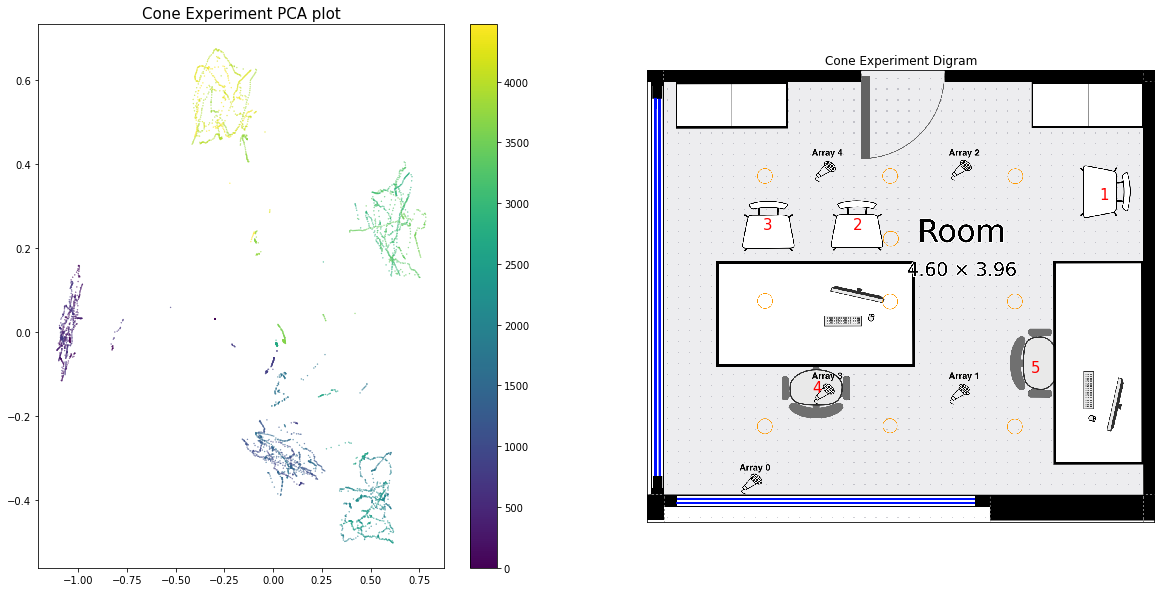

In [87]:
fig = plt.figure(figsize = [20,10])

ax1 = fig.add_subplot(121)
temp = ax1.scatter(projections[:,0], projections[:,1], c = np.arange(projections.shape[0]), s = 0.1)
fig.colorbar(temp)
ax1.set_title('Cone Experiment PCA plot',fontsize = 15)
ax2 = fig.add_subplot(122)
ax2.imshow(img)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
ax2.text(870-450,1030-450,'3', color = 'red', fontsize = 15)
ax2.text(1200-450,1030-450,'2', color = 'red', fontsize = 15)
ax2.text(2100-450,920-450,'1', color = 'red', fontsize = 15)
ax2.text(1050-450,1625-450,'4', color = 'red', fontsize = 15)
ax2.text(1850-450,1550-450,'5', color = 'red', fontsize = 15);
ax2.set_title('Cone Experiment Digram');

In [11]:
start_time = 'Nov 5 2020 2:56:00PM'
end_time = 'Nov 5 2020 2:57:00PM'

In [12]:
x,y = slice_interval_indices(exp_data, start_time, end_time)

See if you can train model to change from PCA space to Physical space

In [3]:
def slice_interval_indices(data, start_timestring, end_timestring):
    
    format_timestring = '%b %d %Y %I:%M:%S%p' # setting format of input time
    
    # convert input timestrings to unix time
    
    start_standard_dt_string = datetime.datetime.strptime(start_timestring, format_timestring) 
    end_standard_dt_string = datetime.datetime.strptime(end_timestring, format_timestring)
    
    unix_start_timestring = datetime.datetime.timestamp(start_standard_dt_string)
    unix_end_timestring = datetime.datetime.timestamp(end_standard_dt_string)
    
    for x in range(data.shape[0]):
        if(data[x,0] > unix_start_timestring and data[x,0] < unix_end_timestring):
            start_index = x
            break
    for y in range(x,data.shape[0]):
        if(data[y,0] > unix_end_timestring):
            end_index = y
            break
    
    return(x,y)

Get means and standard deviations for each minute

In [28]:
minute_projections = []
for i in range(5):
    
    if(i == 4):
        minute = 55 + i
        start_time = 'Nov 5 2020 2:'+str(minute)+':00PM'
        end_time = 'Nov 5 2020 3:00:00PM'
        
        min_x, min_y = slice_interval_indices(exp_data, start_time, end_time)
        temp_proj = projections[min_x:min_y]
        minute_projections.append(temp_proj)
        break
        
    minute = 55 + i
    start_time = 'Nov 5 2020 2:'+str(minute)+':00PM'
    end_time = 'Nov 5 2020 2:'+str(minute+1)+':00PM'
    min_x, min_y = slice_interval_indices(exp_data, start_time, end_time)
    temp_proj = projections[min_x:min_y]
    minute_projections.append(temp_proj)
    

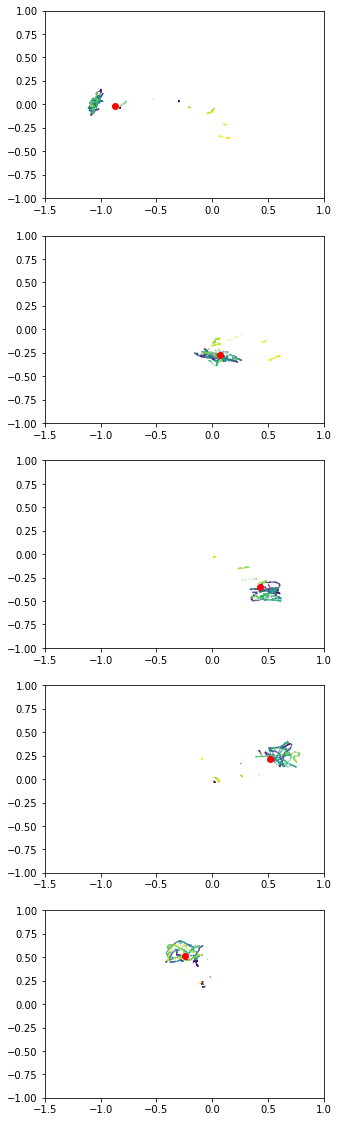

In [76]:
minute_means_x = []
minute_means_y = []

minute_stdx = []
minute_stdy = []
fig, axs = plt.subplots(5,1, figsize = [5, 20])
for i in range(len(minute_projections)):
    axs[i].scatter(minute_projections[i][:,0], minute_projections[i][:,1], c = np.arange(minute_projections[i].shape[0]), s = 0.1)
    axs[i].set_xlim(-1.5,1)
    axs[i].set_ylim(-1,1)
    
    # mean calc
    mn_x = np.mean(minute_projections[i], axis = 0)[0]
    mn_y = np.mean(minute_projections[i], axis = 0)[1]
    minute_means_x.append(mn_x)
    minute_means_y.append(mn_y)
    
    # std calc
    xstd = np.std(minute_projections[i][:,0])
    ystd = np.std(minute_projections[i][:,1])
    
    minute_stdx.append(xstd)
    minute_stdy.append(ystd)
    
    axs[i].scatter(mn_x, mn_y, c = 'red')


In [84]:
# creating pandas array for presentation

nums = [i+1 for i in range(5)]
nums_df = pd.DataFrame(nums, columns = ['Chair Index'])

# means

means_df_x = pd.DataFrame(minute_means_x, columns = ['Mean_X'])
means_df_x

means_df_y = pd.DataFrame(minute_means_y, columns = ['Mean_Y'])
means_df_y

# std

std_df_x = pd.DataFrame(minute_stdx, columns = ['STD_X'])
std_df_x

std_df_y = pd.DataFrame(minute_stdy, columns = ['STD_Y'])
std_df_y


pd.concat([nums_df, means_df_x, means_df_y, std_df_x, std_df_y], axis = 1)

,Chair Index,Mean_X,Mean_Y,STD_X,STD_Y
0,1,-0.867846,-0.016340,0.390467,0.091119
1,2,0.073853,-0.277749,0.143367,0.061935
2,3,0.427182,-0.351777,0.170013,0.138066
3,4,0.518625,0.215098,0.227111,0.115723
4,5,-0.246741,0.516717,0.098863,0.099609


#### Info

We get 5 clusters as expected. We plot this next to the diagram of the chairs.

Chair 2 is the one in the corner.  
Chair 3 is the one closest to the door.  
Chair 4 is right next to chair 3.  
Chair 5 is at Peter's desk.  
Chair 1 is at Chaitanya's desk.

Label these chairs in the above diagram.